# Subgraph GCN
Load subgraphs from their directory, plot the distribution of 
graph sizes. Define the data structure that will be used to represent
MCNF instances and presented to the model for prediction.

In [34]:
import os
import sys
sys.path.insert(0, "..")
import network
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
print(os.getcwd())


/home/aschulz/Documents/huawei_project/notebooks


In [26]:
## Full graph
full_graph = network.load_full_graph()
print("Full graph")
print(f"\tNodes   : {len(full_graph.nodes)}")
print(f"\tEdges   : {len(full_graph.edges)}")
print(f"\tDensity : {nx.density(full_graph)}")

Full graph
	Nodes   : 5464
	Edges   : 11940
	Density : 0.0004000022512689519


In [3]:
## Subgraph sizes
subgraphs = list(network.iter_subgraph())
print(f"Number of subgraphs : {len(subgraphs)}")


Number of subgraphs : 103


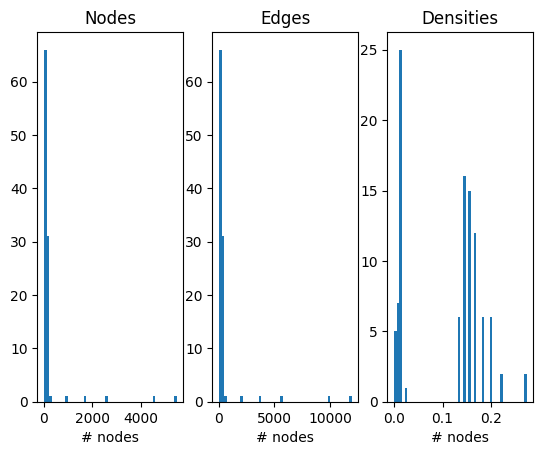

In [35]:
subgraph_carac = np.array([[g.number_of_nodes(),
                   g.number_of_edges(),
                   nx.density(g)
                  ] for g in subgraphs])

f, ax = plt.subplots(1,3)


ax[0].hist(subgraph_carac[:,0],bins=50)
ax[0].set_title("Nodes")
ax[0].set_xlabel("# nodes")
ax[1].hist(subgraph_carac[:,1], bins=50)
ax[1].set_title("Edges")
ax[1].set_xlabel("# nodes")
ax[2].hist(subgraph_carac[:,2], bins=50)
ax[2].set_title("Densities")
ax[2].set_xlabel("# nodes")
plt.show()

In [36]:
## Demands 
full_demands = network.load_full_demands()
print(f"Number of demands : {len(full_demands)}")

Number of demands : 600


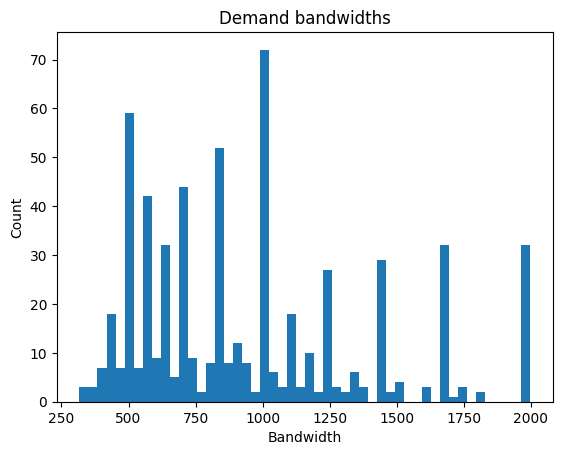

In [37]:
f, ax = plt.subplots(1,1)
ax.hist([d[-1] for d in full_demands], bins=50)
ax.set_title("Demand bandwidths")
ax.set_xlabel("Bandwidth")
ax.set_ylabel("Count")
plt.show()

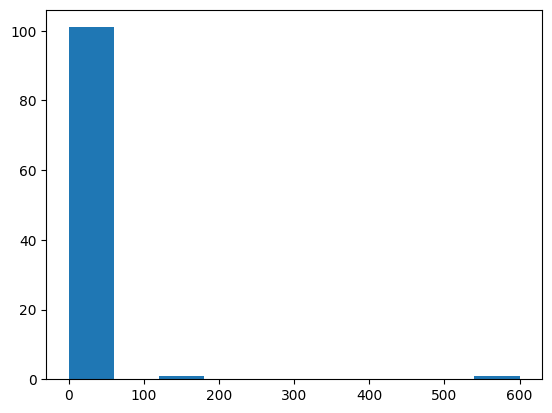

In [58]:
## For each subgraph we can look at the number of demands defined
## between two nodes of said graph.
def graph_contains_demand(g, d):
    """Check that the demand's source and target nodes belong to the
    subgraph.
    """
    return g.has_node(int(d[0])) and g.has_node(int(d[1]))
def graph_activity(g):
    return np.sum([graph_contains_demand(g,d) for d in full_demands])

activities = [graph_activity(g) for g in network.iter_subgraph()]

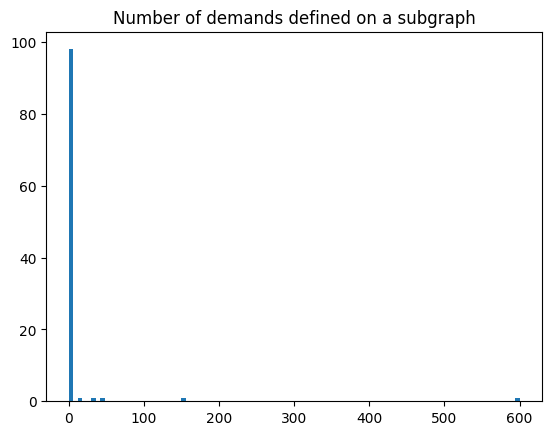

In [60]:
plt.hist(activities, bins=100)
plt.title("Number of demands defined on a subgraph")
plt.show()

In [56]:
## Creating MCNF instances on a subgraph
G = network.get_subgraph(1,2, G=full_graph)
print(f"Subgraph nodes   : {G.number_of_nodes()}")
print(f"Subgraph edges   : {G.number_of_edges()}")
print(f"Subgraph density : {nx.density(G)}")

Subgraph nodes   : 13
Subgraph edges   : 24
Subgraph density : 0.15384615384615385


In [57]:
## Count the number of demands that exist between two nodes of the subgraph
print(np.sum([graph_contains_demand(G,d) for d in full_demands]))

0
